# Исследование данных о российском кинопрокате



**Описание проекта**  
Заказчик этого исследования — Министерство культуры Российской Федерации.  
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.  
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

По заданию, необходимым условием будет объединить данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.

Импортируем библиотеки.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st

import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format

sns.set(style="whitegrid")

Откроем файл mkrf_movies.csv с данными и изучим общую информацию данных о прокатных удостоверениях

In [ ]:
df = pd.read_csv('/datasets/mkrf_movies.csv')
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


Откроем файл `mkrf_shows.csv` — данные о прокате в российских кинотеатрах

In [ ]:
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
mkrf_shows.head()

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


Посмотрим кол-во записей в столбце **box_office**

In [ ]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


3158 записей с датафрейме.

Оценим структуру данных таблицы df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Оценим структуру данных таблицы mkrf_shows

In [ ]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Для объединения таблиц по столбцу **puNumber**, изменим тип данных в таблице `mkrf_shows` на `object`

In [ ]:
mkrf_shows['puNumber'] = mkrf_shows['puNumber'].astype('str')

# посмотрим что все применилось
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   object 
 1   box_office  3158 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


Объединим таблицы `df` и `mkrf_shows` по столбцу **puNumber**

In [ ]:
df = df.merge(mkrf_shows, on='puNumber', how='left')

#выведем на экран данные о получившемся датафрейме, объединенном из двух таблиц
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

После объединения датафреймов, проверили количество записей по столцбу **box_office**, их 3158, как и было в датафрейме `mkrf_shows`, все значения попали в объединенный датафрейм.

Выведем список характерных значений для всего датафрейма.

In [ ]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
refundable_support,332.00,11864457.83,24916555.26,0.00,0.00,0.00,15000000.00,180000000.00
nonrefundable_support,332.00,48980988.89,59980117.92,0.00,25000000.00,30000000.00,40375000.00,400000000.00
budget,332.00,127229716.68,188588333.12,0.00,42000000.00,68649916.00,141985319.50,2305074303.00
box_office,3158.00,76478696.16,240353122.82,0.00,86239.00,2327987.55,23979671.02,3073568690.79


Посмотрим минимальные и максимальные значения для всего датафрейма.

In [ ]:
display(df.min())
display(df.max())

title                                                  Я ПРЕПОД
puNumber                                              111004112
show_start_date                        2010-01-11T12:00:00.000Z
type                                               Анимационный
age_restriction          «0+» - для любой зрительской аудитории
refundable_support                                         0.00
nonrefundable_support                                      0.00
budget                                                     0.00
box_office                                                 0.00
dtype: object

title                                      сНежное шоу
puNumber                                           нет
show_start_date               2019-12-30T12:00:00.000Z
type                                    Художественный
age_restriction          «6+» - для детей старше 6 лет
refundable_support                        180000000.00
nonrefundable_support                     400000000.00
budget                                   2305074303.00
box_office                               3073568690.79
dtype: object

### Вывод
 - Датафрейм `df` содержит данные о прокатных удостоверениях. Мы получили его объединив таблицы `df` и `mkrf_shows`(данные о прокате в российских кинотеатрах) путем объединения их по столбцу **puNumber**, предварительно изменив тип данных в таблице `mkrf_shows` c `int64` на `object`.
 - У одного фильма может быть несколько прокатных удостоверений.

    - **title** — название фильма;
        - в столбце запись идет заглавными и прописными буквами, необходимо будет нормализовать к прописным
    - **puNumber** — номер прокатного удостоверения;
    - **show_start_date** — дата премьеры фильма;
        - требуется перевод в формат datetime дата\время
    - **type** — тип фильма;
    - **film_studio** — студия-производитель;
    - **production_country** — страна-производитель;
        - в столбце есть пропуски, впоследствии изучим возможность заполнить их
    - **director** — режиссёр;
        - в столбце есть пропуски, впоследствии изучим возможность заполнить их
    - **producer** — продюсер;
        - в столбце есть пропуски, впоследствии изучим возможность заполнить их
    - **age_restriction** — возрастная категория;
    - **refundable_support** — объём возвратных средств государственной поддержки;
    - **nonrefundable_support** — объём невозвратных средств государственной поддержки;
    - **financing_source** — источник государственного финансирования;
        - в столбце есть пропуски, впоследствии изучим возможность заполнить их
    - **budget** — общий бюджет фильма;
        - минимальное значение бюджет фильма 0, необходимо будет с этим разобраться
    - **ratings** — рейтинг фильма на КиноПоиске;
        - в столбце есть пропуски, впоследствии изучим возможность заполнить их
    - **genres** — жанр фильма.
    - **box_office** — сборы в рублях.
        - минимальное значение 0, необходимо будет с этим разобраться    

- Столбец **budget** уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица `df` содержит 7486 строк, 16 столбцов. В таблице содержатся пропущенные значения, в некоторых столбцах не корректный тип данных. В одном случае в названии столбца содержится заглавная буква, отсутствует змеиный регистр.



## Предобработка данных

### Проверьте типы данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

Поработаем с типом данных datetime дата\время в столбце `show_start_date` (object --> datetime)

In [ ]:
df['show_start_date']= pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

#проверим обработку
df['show_start_date'].head()

0   2015-11-27 12:00:00+00:00
1   2016-09-13 12:00:00+00:00
2   2016-10-10 12:00:00+00:00
3   2016-06-10 12:00:00+00:00
4   2015-07-29 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]

#### Вывод:
 - В столбце **show_start_date** тип данных изменили с `object` на `datetime дата\время`
 - В столбце **ratings** тип данных `object`, мы поработаем над ним в дальнейшем.

### Изучим пропуски в датафрейме

- Объясним, почему заполнили пропуски определённым образом или почему не стали этого делать.

Посмотрим сколько пропусков есть в столбцах в процентном соотношении от общего кол-ва записей.

In [ ]:
for column in df:
    print('{0:30} {1:.2%}'.format(column, df[column].isna().mean()))

title                          0.00%
puNumber                       0.00%
show_start_date                0.00%
type                           0.00%
film_studio                    0.24%
production_country             0.03%
director                       0.12%
producer                       7.59%
age_restriction                0.00%
refundable_support             95.57%
nonrefundable_support          95.57%
budget                         95.57%
financing_source               95.57%
ratings                        12.92%
genres                         13.04%
box_office                     57.81%


Посмотрим внимательнее на столбец **ratings**

In [ ]:
display(df[df['ratings'].isna()].head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для всех фильмов, у которых не указан рейтинг, не представляется возможность заполнить значения, пропусков 12.92% на всю таблицу. Оставляем как есть.

Посмотрим внимательно на пропуски в столбце Жанры **genres**

In [ ]:
display(df[df['genres'].isna()].head())
df['genres'].unique()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

Таких данных 13.04% по всей таблице, заполним значением `не указан`

In [ ]:
df['genres'] = df['genres'].fillna('не указан')

Посмотрим число нулевых значений в столбцах датафрейма.

In [ ]:
df.isin([0]).sum()

title                      0
puNumber                   0
show_start_date            0
type                       0
film_studio                0
production_country         0
director                   0
producer                   0
age_restriction            0
refundable_support       221
nonrefundable_support      9
budget                    17
financing_source           0
ratings                    0
genres                     0
box_office                24
dtype: int64

#### Вывод:
   - в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` огромное количество пропусков (95.57%), это обусловлено тем, что изначально в предоставленной информации сообщалось, - "столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку". Эти данные заполнять нечем, оставляем их как есть.
    
    
   - в столбце `film_studio` 0.24% пропусков, это не существенно, на исследование не повлияет, их заполнять не будем
    
    
   - в столбце `production_country` 0.03% пропусков, это не существенно, на исследование не повлияет, их заполнять не будем
    
    
   - в столбце `director` 0.12% пропусков, это не существенно, на исследование не повлияет, их заполнять не будем
    
    
   - в столбце `producer` 7.59% пропусков, это не существенно, на исследование не повлияет, их заполнять не будем
    
    
   - в столбце `ratings` 12.92% пропусков, не представляется возможность заполнить значения, оставляем как есть
    
    
   - в столбце `genres` 13.04% пропусков, заполнили значением `не указан`
    
    
   - в столбце `box_office` - сборы в рублях, 57.81% пропусков, нам известны данные о прокате только в российских кинотеатрах, заполнять пропуски мы не будем, в дальнейшем в исследованиях эта информация не понадобится, оставляем пропуски  


Обнаружены нулевые значения в столбцах:
 - `refundable_support`       221 шт.
 - `nonrefundable_support`      9 шт.
 - `budget`                    17 шт.
 - `box_office`                24 шт.

###  Изучим дубликаты в датафрейме
- Проверим, есть ли в данных дубликаты. Опишем причины, которые могли повлиять на появление дублей.

Найдем явные дубликаты в датафрейме

In [ ]:
df.duplicated().sum()

0

Изучим не явные дубликаты.  
Начнем со стоблца `title`

In [ ]:
df['title'].value_counts().head()

День святого Валентина_                5
Дитя тьмы                              4
Дорога /По новелле Кормака МкКарфи/    4
Лузеры                                 4
Красавчик-2                            4
Name: title, dtype: int64

Посмотрим внимательнее на первую строку

In [ ]:
df[df['title'] == 'День святого Валентина_']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3902,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
3991,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4070,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4196,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
5070,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN


Вывод: прокатные удостоверения `puNumber` для названия `День святого Валентина_` разные, значит это не ошибка. Повлиять на появление дублей могло то, что разные прокатные компании показывали фильм, и выдавалось каждый раз новое прокатное удостоверение.

Изучим дубли в столбце `puNumber`

In [ ]:
df['puNumber'].value_counts().head()

221054410    2
221154310    2
124003618    1
121020313    1
111008918    1
Name: puNumber, dtype: int64

Выведем на экран первое совпадение

In [ ]:
df[df['puNumber'] == '221154310']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN


Посмотрим на второе совпадение

In [ ]:
df[df['puNumber'] == '221054410']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


#### Вывод:
 - У фильмов названия отличаются. Возникновение дубликатов можно объяснить тем, что ведомство выдающее прокатное удостоверение сделало ошибку выдав разны фильмам одинаковый номер. Это случилось в двух случаях. Оставляем как есть.

### Изучим категориальные значения

- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправим проблемные значения в поле `type`.

Изучим данные в столбце `type`

In [ ]:
df['type'].value_counts().head(10)

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

Обнаружили пробел в начале слова в категории фильма `Художественный` и `Анимационный`, исправим это, удалив все пробелы которые встречаются в начале и в конце строки.

In [ ]:
df['type'] = df['type'].str.strip()

df['type'].value_counts().head(10) # и выведем на экран обновленные данные столбца

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

Изучим данные в столбце `age_restriction`

In [ ]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Категоризируем их для дальнейшего удобства.  
Напишем функцию, создадим новый столбец с категоризированными значениями, назовем `age_group`

In [ ]:
def age_restr_cat(row):
    if row == '«18+» - запрещено для детей':
        return '18+'
    if row == '«16+» - для детей старше 16 лет':
        return '16+'
    if row == '«12+» - для детей старше 12 лет':
        return '12+'
    if row == '«6+» - для детей старше 6 лет':
        return '6+'
    return '0+'

df['age_cat'] = df['age_restriction'].apply(age_restr_cat)
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_cat
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,18+
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,6+
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18+
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18+
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18+


#### Вывод:
 - В столбце **type** встречались пробелы, исправили это
 - Категоризировали данные, создав столбец **age_cat**

Общая проблема встречается почти во всех категориальных столбцах. Почти во всех категориальных переменных есть повторяющиеся значения в совокупности с другими. Например: `драма,триллер`, `драма,военный`. В столбце **financing_source** это `Министерство культуры`, `Фонд кино`, `Министерство культуры, Фонд кино`. Это не можем исправить. Поэтому формировать категории и сравнивать мы не сможем по столбцам `film_studio`, `production_country`, `director`, `producer`, `genres` и `financing_source`.

### Проверем количественные значения

- Проверем, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

Посмотрим на уникальные значения столбца `ratings`

In [ ]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Аномальными выглядят значения с проставленными процентами, такие как `'28%', '99%'` и др, приведем их к одному виду рейтинга от 1 до 10.  
Напишем функцию для замены.  
И результат переведем в тип `float`.

In [ ]:
def remove_perc(rating):
# print
    if str(rating).endswith('%'):
        return float(rating[:-1])/10
    else:
        return rating

df['ratings'] = df['ratings'].apply(remove_perc)
df['ratings'] = df['ratings'].astype('float64')
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

Из исходного задания нам известно, что столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.  
Выведем на экран таблицу, где бюджет фильмов равен 0.

In [ ]:
display(df[df['budget'] == 0].head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_cat
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10,16+
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163511.00,16+
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572438.40,12+
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",67418974.80,16+
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40,6+


Обнаружили, что фильмы у которых бюджет 0, но значения `refundable_support` — объём возвратных средств государственной поддержки и `nonrefundable_support` — объём невозвратных средств государственной поддержки, не равны нулю, т.е. картины которые спонсировались государством, в этих значениях бюджет 0, что не правильно, исправим это.  
Напишем функцию, которая добавит в значения бюджета фильма сумму возвратных и не возвратных средств гос.поддержки.

In [ ]:
def budget_corr(row):
    if row['budget'] < (row['refundable_support'] + row['nonrefundable_support']):
        return row['refundable_support'] + row['nonrefundable_support']
    return row['budget']
df['budget'] = df.apply(budget_corr, axis=1)

Проверим, остались ли записи в таблице, где значения 0 в столбце `budget`

In [ ]:
print('Обнаружено значений:', len(df[(df['refundable_support'] + df['nonrefundable_support']) > df['budget']]))

Обнаружено значений: 0


#### Вывод:
 - Исправили значения в столбце **ratings**
 - Добавили в значения бюджета фильма сумму возвратных и не возвратных средств гос.поддержки

Возможная причина возникновения ошибочных данных в столбце **ratings** - произошло при объединении нескольких баз данных, т.к. числовые значения соседствовали с процентными значениями. В дальнейшем можно уточнить этот момент у ответственного за выгрузку данных человека.

Посмотрим как распределены наши данные, есть ли в них аномально большие или аномально маленькие значения.

In [ ]:
df.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,332.00,332.00,332.00,6519.00,3158.00
mean,11864457.83,48980988.89,131422395.80,6.49,76478696.16
std,24916555.26,59980117.92,187148242.67,1.11,240353122.82
min,0.00,0.00,6000000.00,1.00,0.00
25%,0.00,25000000.00,45524799.50,5.90,86239.00
50%,0.00,30000000.00,71196901.50,6.60,2327987.55
75%,15000000.00,40375000.00,150000000.00,7.20,23979671.02
max,180000000.00,400000000.00,2305074303.00,9.90,3073568690.79


Напишем функцию для визуализации того как распределены данные, строит диаграммы размаха и гистограмму.

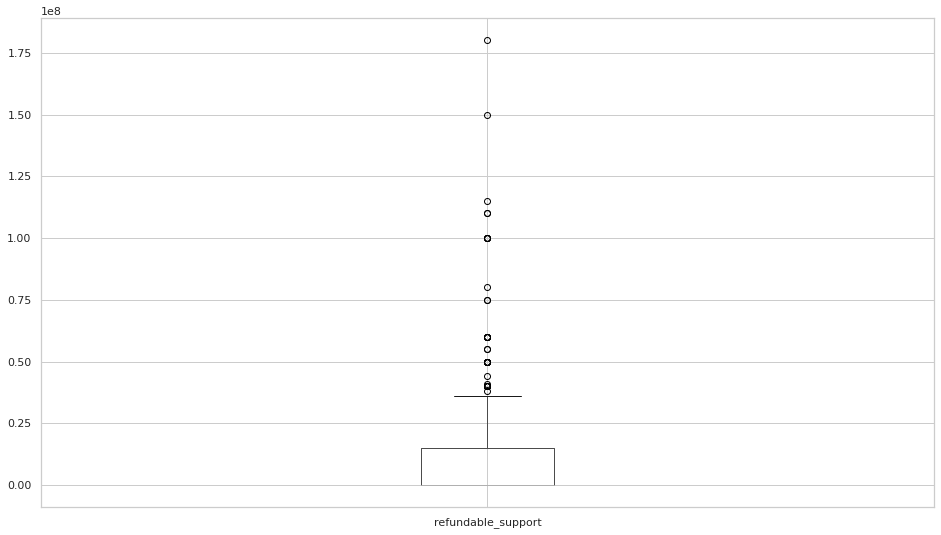

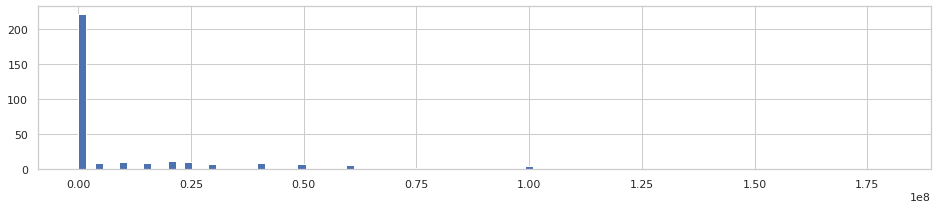

In [ ]:
def descr_numeric(target_column):  # аргумент функции название столбца
    df.boxplot(column=target_column, figsize=(16,9));
    plt.show()
    df[target_column].hist(figsize=(16,3), bins=100);

descr_numeric('refundable_support')

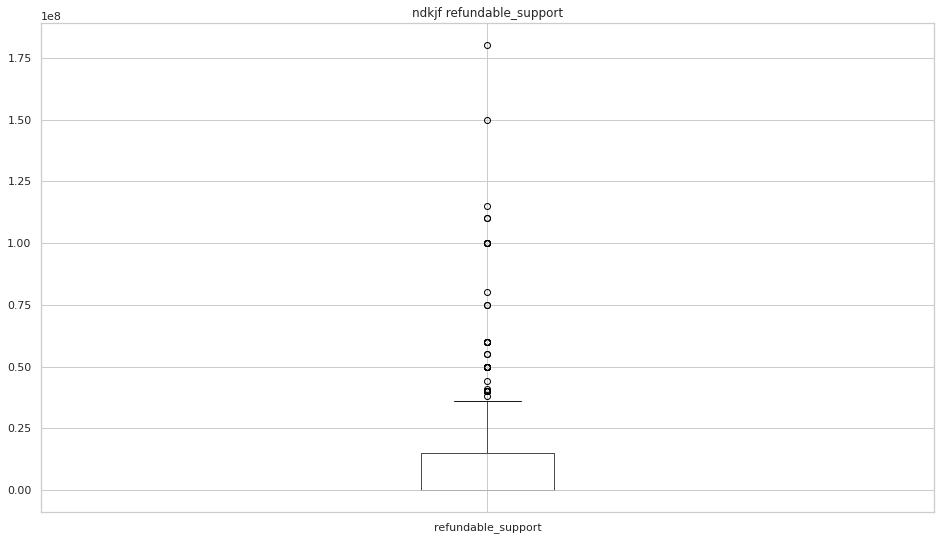

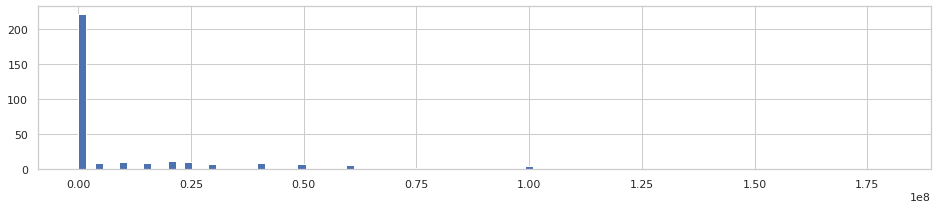

In [ ]:
def descr_numeric(target_column):  # аргумент функции название столбца
    df.boxplot(column=target_column, figsize=(16,9));
    plt.title('ndkjf {}'.format(target_column))
    plt.show()
    df[target_column].hist(figsize=(16,3), bins=100);

descr_numeric('refundable_support')

Очень много нулевых значений, а так же анамально большие значения (выбросы) 180000000 рублей.  
Взглянем на значения от 1 до 60000000 рублей

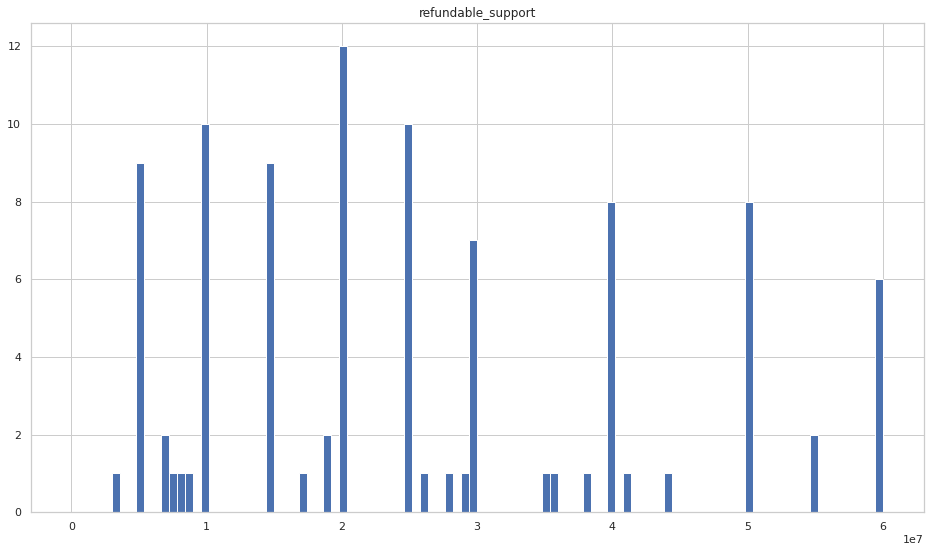

In [ ]:
basket = 100
df.hist('refundable_support', bins=basket, figsize=(16,9), range=(1, 60000000));

Вглянем на значения в столбце **nonrefundable_support**

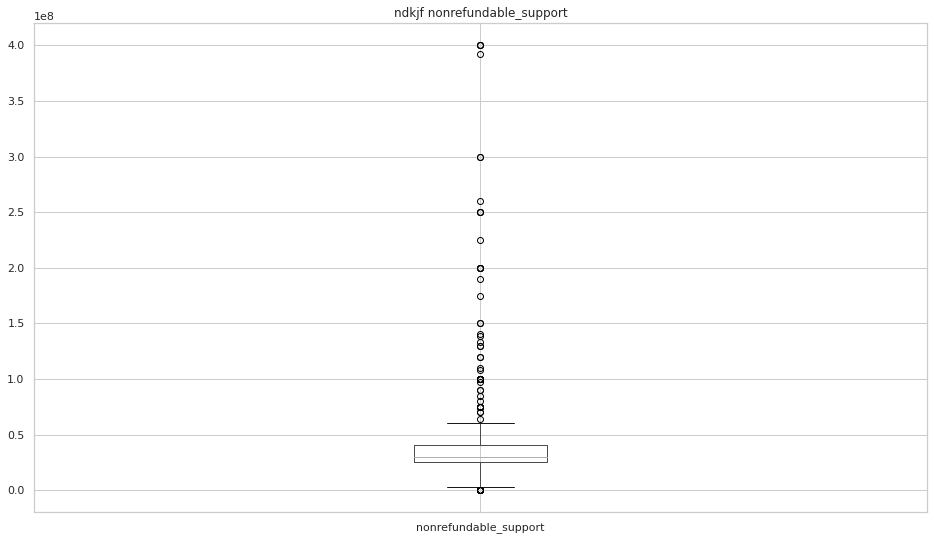

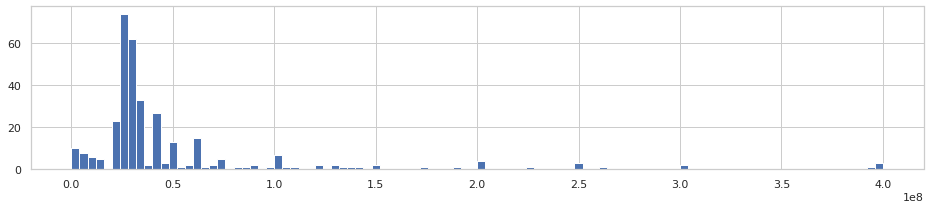

In [ ]:
descr_numeric('nonrefundable_support')

Присутствуют нулевые значения, выбросы 400 млн рублей. Посмотрим значения от 1 до 100 млн. рублей

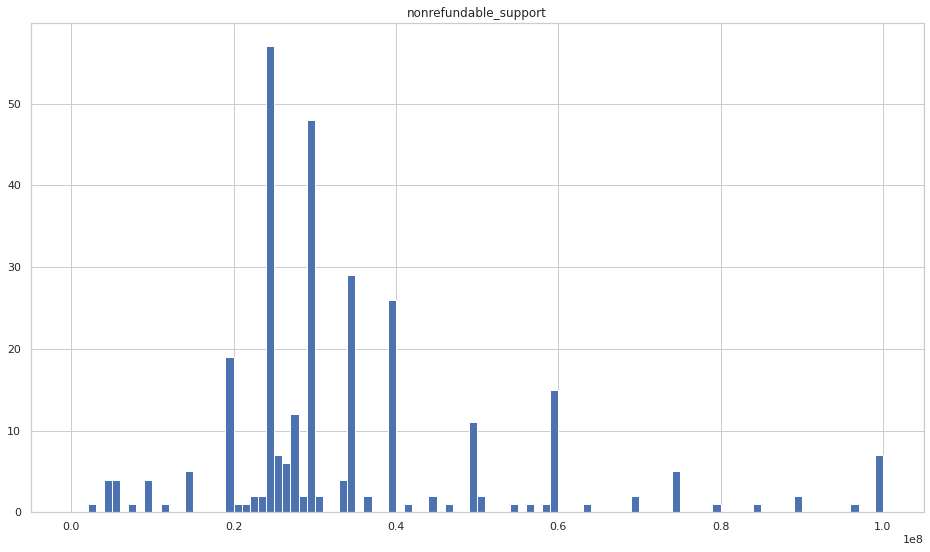

In [ ]:
basket = 100
df.hist('nonrefundable_support', bins=basket, figsize=(16,9), range=(1, 100000000));

Вглянем на значения в столбце **budget**

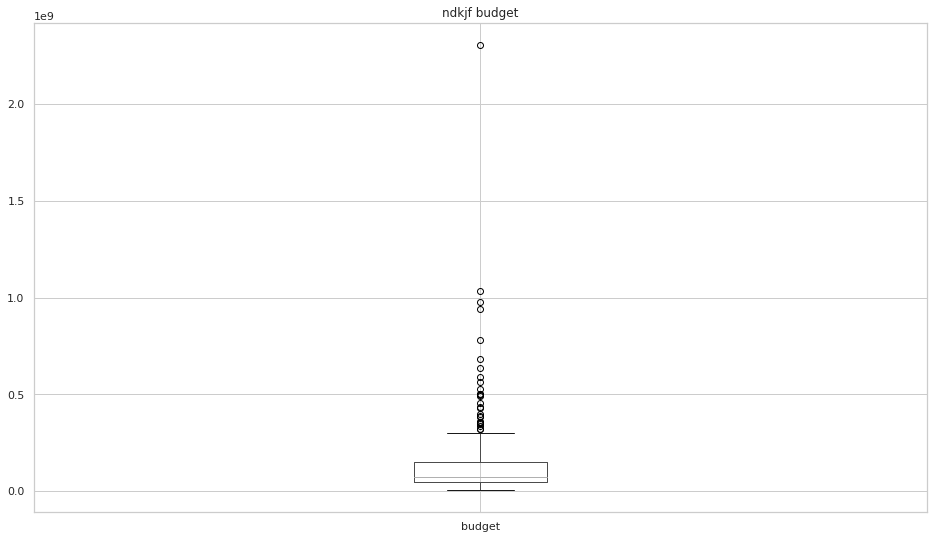

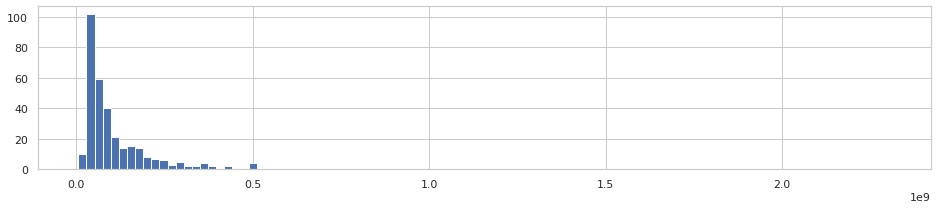

In [ ]:
descr_numeric('budget')

Есть выбросы, 2 млрд.305 млн. Посмотрим значения от 0 до 200 млн. рублей

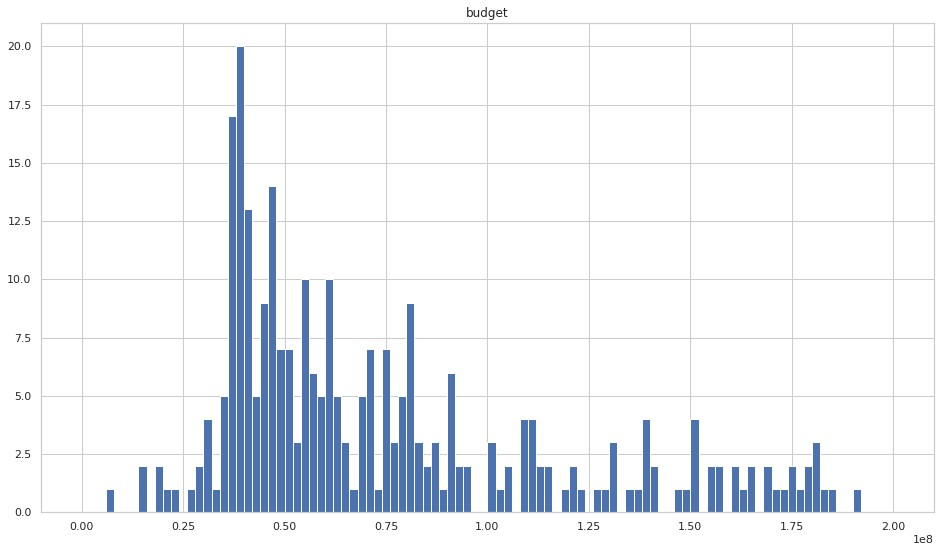

In [ ]:
basket = 100
df.hist('budget', bins=basket, figsize=(16,9), range=(0, 200000000));

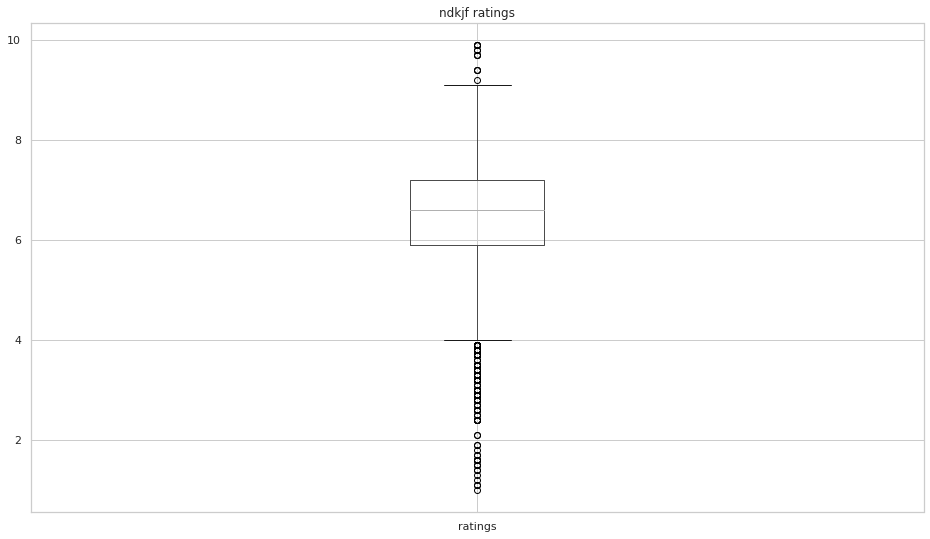

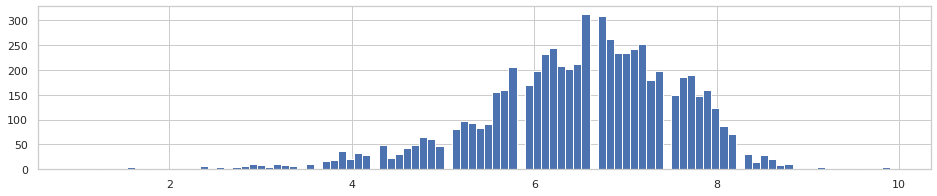

In [ ]:
descr_numeric('ratings')

Значения в столбце рейтинг распределены равномерно, выбросов нету, основные оценки в диапазоне 5.9 - 7.5

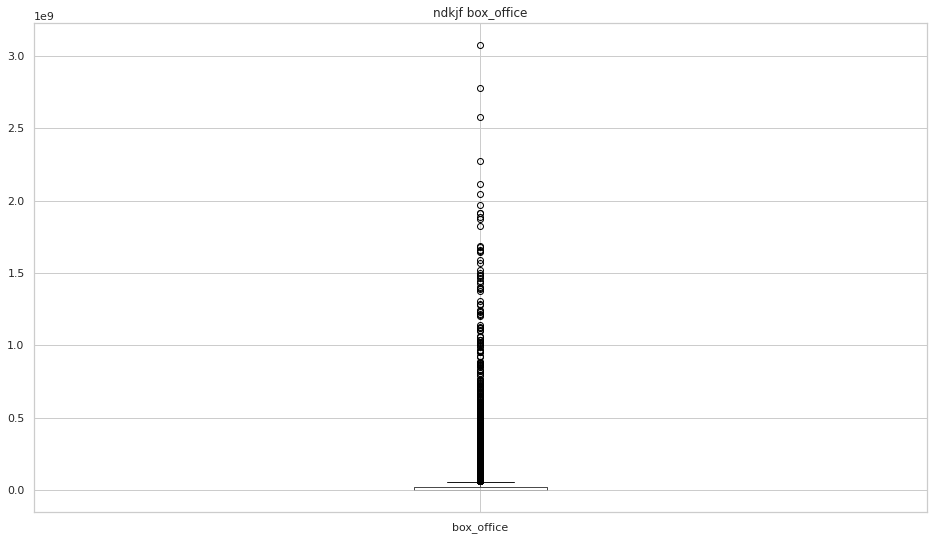

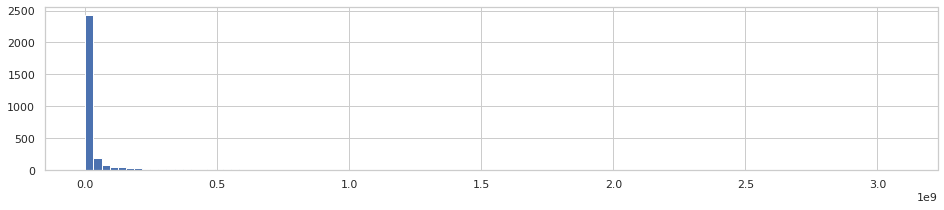

In [ ]:
descr_numeric('box_office')

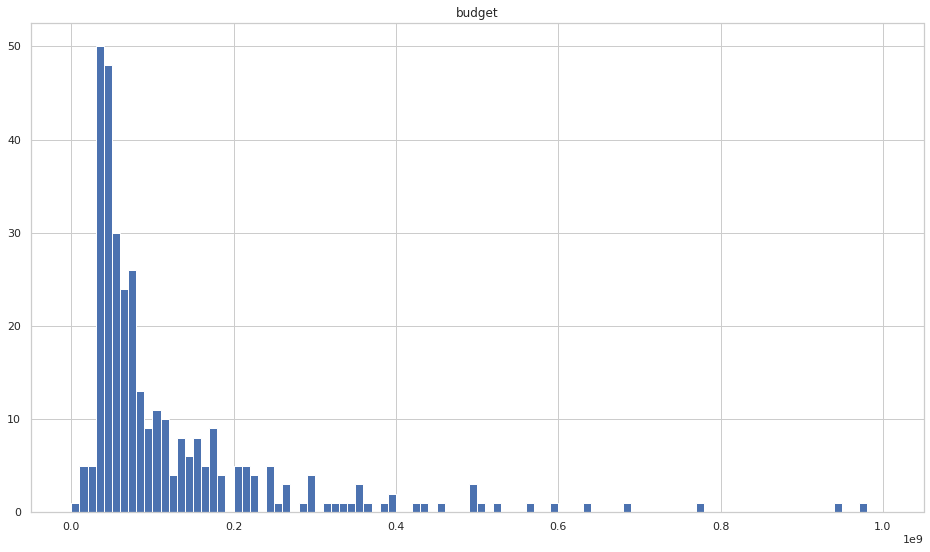

In [ ]:
basket = 100
df.hist('budget', bins=basket, figsize=(16,9), range=(1, 1000000000));

Анализ распределения данных во всех количественных столбцах: `refundable_support`, `nonrefundable_support`, `budget`, `ratings`, `box_office` показал, что выбросов мало, ими можно принебречь при проведении дальнейших исследований.

### Добавим новые столбцы





- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

Создадим столбец с информацией о годе проката и назовем его **show_start_year**

In [ ]:
df['show_start_year'] = df['show_start_date'].dt.year
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_cat,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,18+,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,6+,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,18+,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,18+,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,18+,2015


- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

Создадим функцию, которая берет первое значение из текста до запятой.

In [ ]:
def get_first_value(string, sep = ','):
    value_list = string.split(sep=sep)
    return value_list[0]

Создадим столбцы с именем и фамилией главного режиссёра **main_director** и основным жанром фильма **main_genre** и выведем первые значения обновленной таблицы.

In [ ]:
df['main_director'] = df[df['director'].isnull() == False]['director'].apply(get_first_value)
df['main_genre'] = df[df['genres'].isnull() == False]['genres'].apply(get_first_value)
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_cat,show_start_year,main_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,18+,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,6+,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,18+,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,18+,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,18+,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Создадим столбец показывающий какую долю от общего бюджета фильма составляет государственная поддержка, назовем его **perc_gov_sup**

In [ ]:
df['perc_gov_sup'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']

#### Вывод:
- Создали столбец с информацией о годе проката и назвали его **show_start_year**
- Создали столбцы с именем и фамилией главного режиссёра **main_director** и основным жанром фильма **main_genre**
- Создали столбец показывающий какую долю от общего бюджета фильма составляет государственная поддержка, **perc_gov_sup**

## Проведем исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Посмотрим, сколько фильмов выходило в прокат каждый год, выведем на экран то количество, где есть информация о кассовых сбрах.

In [ ]:
df.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = ['count'])

,count
,box_office
show_start_year,
2010,105
2011,109
2012,128
2013,184
2014,279
2015,465
2016,526
2017,357


С 2010 по 2016 года количество фильмов выходящих в прокат росло. С 2016 виден спад с 526 фильмов до 357 фильмов в 2017 году. Дальше с 2017 до 2019 года опять рост.

Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [ ]:
box_office_movies = df[df['box_office'].isnull() == False]
box_office_movies_pt = box_office_movies.pivot_table(index='show_start_year', values='title', aggfunc='count')

movies_pt = df.pivot_table(index='show_start_year', values='title', aggfunc='count')
share = box_office_movies_pt.merge(movies_pt, on='show_start_year', how='left')
share['share'] = round(share['title_x'] / share['title_y'], 2)
share

,title_x,title_y,share
show_start_year,,,
2010,105,985,0.11
2011,109,622,0.18
2012,128,593,0.22
2013,184,630,0.29
2014,279,807,0.35
2015,465,705,0.66
2016,526,818,0.64
2017,357,505,0.71
2018,475,891,0.53


Доля фильмов растет с 2010 по 2017 год, далее в 2018 году виден спад на 18 %, и далее доля опять начинает расти.  
Общее количество фильмов по годам растет с 2010 по 2016, далее спад до 505 фильмов в 2017 году, и с 2018 до 2019 годов опять наблюдаем рост количества фильмов.

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Изучим как менялась динамика проката фильмов по годам.

In [ ]:
df.groupby('show_start_year')['box_office'].sum().sort_values()

show_start_year
2010       2428654.00
2012       6955423.00
2011      14102765.00
2013      29799706.20
2014    7444951859.20
2015   39497365196.40
2016   47866299741.91
2019   48425708779.59
2017   48563707217.51
2018   49668403134.32
Name: box_office, dtype: float64

Изучив как менялась динамика проката по годам, выяснили следующее:
 - Минимальная сумма сборов была в 2010 году
 - Максимальная сумма сборов была в 2018 году

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [ ]:
df.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = ['median' , 'mean'])

,median,mean
,box_office,box_office
show_start_year,,
2010,1700.00,23130.04
2011,3000.00,129383.17
2012,5660.00,54339.24
2013,3522.50,161954.92
2014,18160.00,26684415.27
2015,4920933.00,84940570.31
2016,3846679.41,91000569.85
2017,9968340.00,136032793.33


С 2010 по 2014 года мало данных по сборам. Максимум по сборам приходится на 2017-2018 года.

В сводной таблице, отобразив среднюю и медианную сумму сборов для каждого года, мы видим, что среднее значение и медианное значения очень сильно отличается. Причина в том, что в столбце кассовые сборы присутствуют очень большие единичные значения(выбросы).

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположим, с чем это может быть связано.

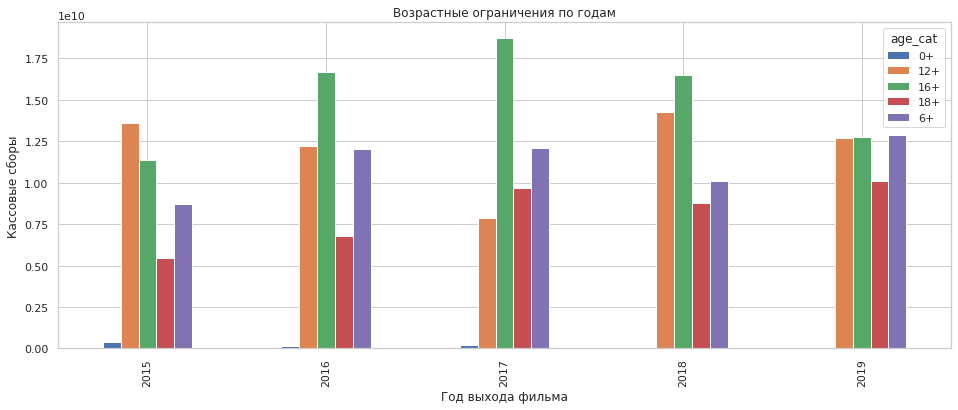

In [ ]:
(df
    .query('show_start_year > 2014')
    .pivot_table(index = 'show_start_year',
                  columns = 'age_cat',
                  values = 'box_office',
                  aggfunc = 'sum')
    .plot(kind = 'bar', figsize = (16,6))
)
plt.title('Возрастные ограничения по годам')
plt.xlabel('Год выхода фильма')
plt.ylabel('Кассовые сборы')
plt.show()

Построим график, показывающий медианные сборы по возрастным категориям.

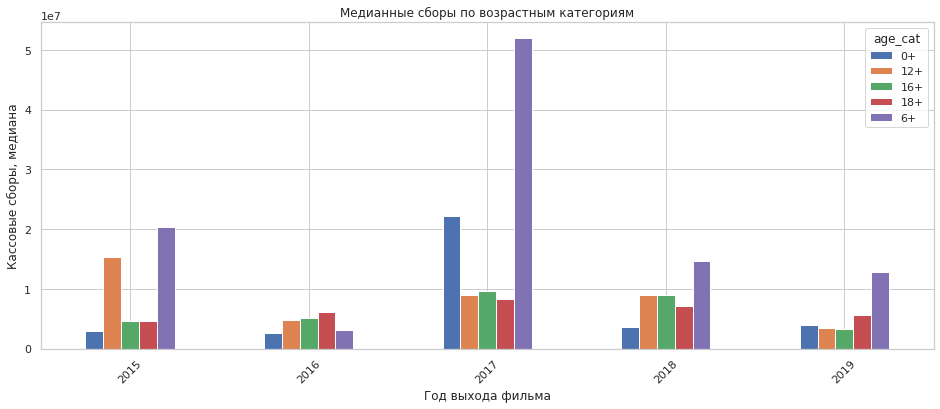

In [ ]:
(df
    .query('show_start_year > 2014')
    .pivot_table(index = 'show_start_year',
                  columns = 'age_cat',
                  values = 'box_office',
                  aggfunc = 'median')
    .plot(kind = 'bar', figsize = (16,6))
)
plt.xticks(rotation = 45)
plt.title('Медианные сборы по возрастным категориям')
plt.xlabel('Год выхода фильма')
plt.ylabel('Кассовые сборы, медиана')
plt.show()

### Вывод:

- Возрастное ограничение аудитории напрямую влияет на сборы фильма в прокате, например фильмы 0+ почти не собирают кассу, в то время как на всем протяжении с 2015 года по 2019 фильмы 16+ показывают высокие сборы. Так, фильмы с ограничением возраста 16+ собрали больше всего денег в прокате с 2016 по 2018 года.  
- В зависимости от года меняются сборы, в 2015 году лидировали фильмы 12+, на следующий 2016 год и далее 2017 года сборы снижались, а потом резкий скачек в 2018 году.  
- На всем протяжении с 2015 по 2019 года виден неуклонный рост сборов фильмов для 18+
- Можно сделать вывод что картины с рейтингом 0+ и 6+ это анимационные мультифильмы, на сеанс ходят дети в сопровождении взрослых, фильмов 0+ выпускается мало в силу того что ходить взрослые с детьми могут преимущественно в выходные и праздничные дни, поэтому сборы проигрывают фильмам блокбастерам которые имеют ограничение 16+ и 18+, самые кассовые и зрелищные фильмы

## Исследуем фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищем интересные закономерности в данных. Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Создадим датафрейм, где будут значения с фильмами, которые получили государственную поддержку.

In [ ]:
df['full_gover_support'] = df['refundable_support'] + df['nonrefundable_support']

df_goss_support= df[df['full_gover_support'].isna() == False].copy()
df_goss_support.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,age_cat,show_start_year,main_director,main_genre,perc_gov_sup,full_gover_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,8.10,"драма,мелодрама",365353.60,16+,2013,А.Атанесян,драма,0.33,26500000.00
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,Министерство культуры,NaN,не указан,28140.00,12+,2014,А.Якимчук,не указан,0.70,26000000.00
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,Фонд кино,5.30,"комедия,фантастика",19957031.50,12+,2013,Р.Давлетьяров,комедия,0.61,107847945.00
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,4.20,драма,55917.50,16+,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69,28000000.00
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,6.40,драма,232100.00,16+,2014,М.Угаров,драма,0.62,25000000.00


Посмотрим сколько записей в датафрейме с фильмами, которые получили государственную поддержку

In [ ]:
df_goss_support['puNumber'].count()

332

Посмотрим какие бывают данные в столбце **financing_source** источник финансирования

In [ ]:
df_goss_support['financing_source'].unique()

array(['Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

- Источников финансирования три: `Министерство культуры`, `Фонд кино`, `Министерство культуры совместно с Фонд кино`

Посмотрим, откуда идет больше средств на поддержку кино.

In [ ]:
df_goss_support.groupby('financing_source')['full_gover_support'].sum().sort_values()

financing_source
Министерство культуры, Фонд кино    1185431354.00
Министерство культуры               4836661000.00
Фонд кино                          14178595958.00
Name: full_gover_support, dtype: float64

Больше всего спонсирует Фонд кино (14 млрд, 178 млн. руб.), на втором месте Министерство культуры, и замыкает тройку Министерство культуры в содружестве с Фонд кино (1 млрд. 185 млн. руб.).

Посмотрим график показывающий объём возвратных средств государственной поддержки и кассовые сборы фильмов по годам.

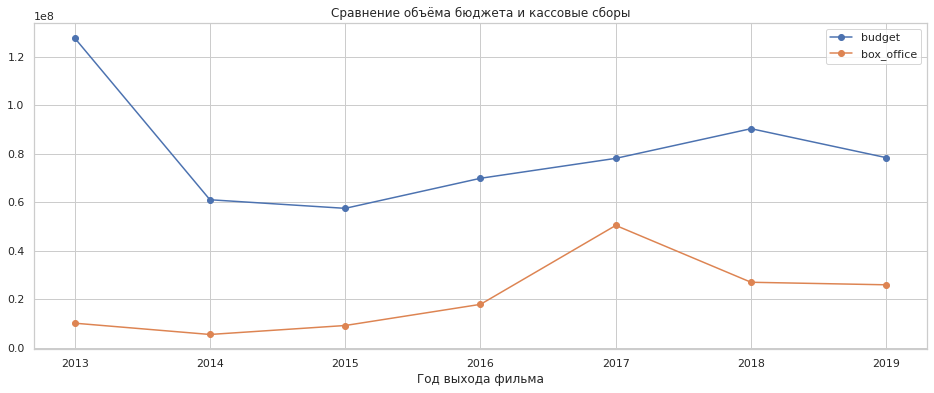

In [ ]:
financing_source_movies = df_goss_support.query('full_gover_support > 0')

(financing_source_movies
     .sort_values(by='refundable_support',ascending=True)
     .groupby('show_start_year')['budget'].median()
     .plot(x='show_start_year',y='budget',style='o-',grid=True,figsize=(16,6),legend=True)
)

(financing_source_movies
     .groupby('show_start_year')['box_office'].median()
     .plot(x='show_start_year',y='box_office',style='o-',grid=True,figsize=(16,6),legend=True)
)
plt.title('Сравнение объёма бюджета и кассовые сборы')
plt.xlabel('Год выхода фильма')
plt.show()


- Во все года с 2013 по 2019 бюджеты фильмов превышают кассовые сборы год к году.

Посмотрим диаграмму размаха для данных по рейтингу фильмов

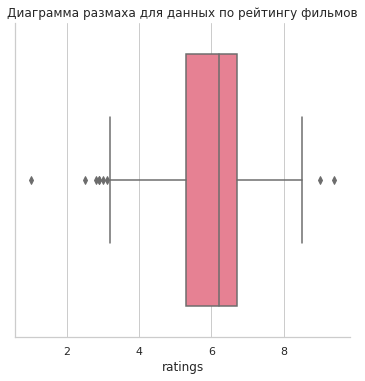

In [ ]:
sns.catplot(x='ratings', kind='box', data=financing_source_movies, palette='husl')
plt.title('Диаграмма размаха для данных по рейтингу фильмов')
plt.show()

В большинстве своем рейтинг кинофильмов 5 - 6.7

Сравним с рейтингами фильмов по всему датафрейму, выведем диаграмму размаха на экран

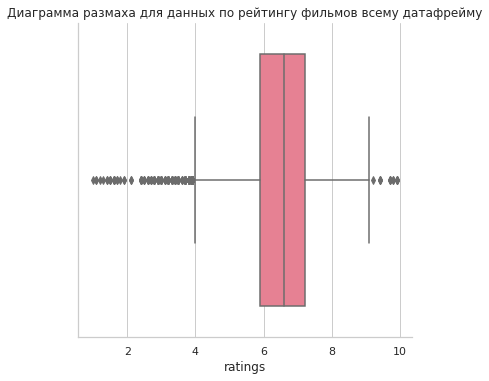

In [ ]:
sns.catplot(x='ratings', kind='box', data=df, palette='husl')
plt.title('Диаграмма размаха для данных по рейтингу фильмов всему датафрейму')
plt.show()

Средний рейтинг фильмов по всему датафреймум - 5.9 - 7.3

Изучим фильмы, которые окупились

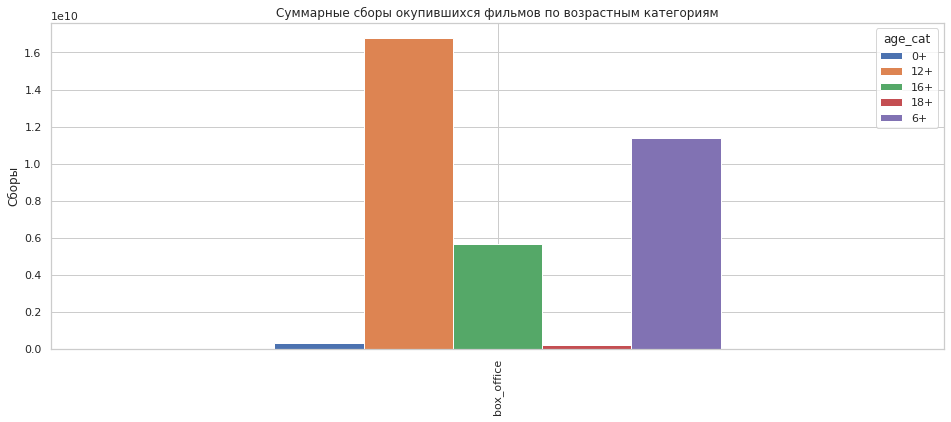

In [ ]:
the_film_paid_off = financing_source_movies.query('box_office - budget > 0')

(the_film_paid_off
    .pivot_table(columns = 'age_cat',
                  values = 'box_office',
                  aggfunc = 'sum')
    .plot(kind = 'bar', figsize = (16,6))
)
plt.title('Суммарные сборы окупившихся фильмов по возрастным категориям')
plt.ylabel('Сборы')
plt.show()

Фильмы, которые окупились имеют преимущественно рейтинг 12+, на втором месте фильмы с рейтингом 6+,и далее 16+.

Выведем жанры фильмов которые окупаются в прокате.

In [ ]:
the_film_paid_off['genres'].value_counts().head()

комедия                            17
комедия,мелодрама                   7
драма                               5
мультфильм,приключения,семейный     4
драма,мелодрама                     2
Name: genres, dtype: int64

В прокате окупаются комедии, мелодрамы, мультфильмы.

Выведем тип фильмов

In [ ]:
the_film_paid_off['type'].value_counts()

Художественный    67
Анимационный      12
Name: type, dtype: int64

Художественные фильмы лидируют, на втором месте анимационные.

Посмотрим жанры которые лидируют в не окупившихся фильмах

In [ ]:
the_film_was_stagnant = financing_source_movies.query('box_office - budget < 0')
the_film_was_stagnant['genres'].value_counts().head()

драма                             40
комедия                           15
не указан                         14
комедия,мелодрама                  9
мультфильм,комедия,приключения     5
Name: genres, dtype: int64

Фильмы драмы не окупаются чаще других жанров. На втором месте комедии - не все комедии, получается, пользуются спросом.

Посчитаем в процентном соотношении фильмы провальные в плане возврата господдержки на кассовые сборы.

In [ ]:
print('Доля фильмов, у которых господдержка меньше чем сборы')
print(round(df_goss_support.query('budget < box_office')['puNumber'].count() / df_goss_support['puNumber'].count(),3))

print('Доля фильмов, у которых господдержка больше чем сборы')
print(round(df_goss_support.query('budget > box_office')['puNumber'].count() / df_goss_support['puNumber'].count(),3))

Доля фильмов, у которых господдержка меньше чем сборы
0.238
Доля фильмов, у которых господдержка больше чем сборы
0.72


- Доля фильмов, у которых бюджет меньше чем сборы - 23%
- Доля фильмов, у которых бюджет больше чем сборы - 72 %

Построим диаграмму рассеяния зависимости суммы поддержки от рейтинга

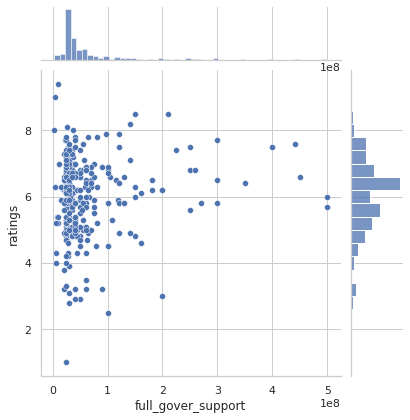

In [ ]:
sns.jointplot(data=df_goss_support, x='full_gover_support', y='ratings', kind='scatter');

- Основное количество фильмов с господдержкой это до 100 млн рублей, рейтинг 5-8 кинопоиска
- С увеличением господдержки - нету прямой зависимости рейтинга, он не растет
- Почти нету фильмов с рейтингом выше 8

Посмотрим какие фильмы спонсируются чаще других.

In [ ]:
df_goss_support['age_cat'].value_counts()

16+    125
12+    106
6+      65
18+     28
0+       8
Name: age_cat, dtype: int64

Фильмы 16+ и 12+ получают господдержку чаще, далее идут 6+ и 18+.

### Вывод:

 - Определили количество фильмов, которые получили государственную поддержку - 322
 - Посмотрели график, показывающий объём возвратных средств государственной поддержки и кассовые сборы фильмов по годам. Выяснили, что во все года с 2013 по 2019 бюджеты фильмов превышают кассовые сборы год к году
 - Посмотрели по диаграмме размаха, что в большинстве своем рейтинг кинофильмов 5 - 6.7
 - Изучили фильмы, которые окуплись. Они имеют преимущественно рейтинг 12+, на втором месте фильмы с рейтингом 6+,и далее 16+
 - В прокате окупаются комедии, мелодрамы, мультфильмы, а тип фильмов - художественные фильмы лидируют, на втором месте анимационные
 - Среди не окупившихся фильмов - драмы не окупаются чаще других жанров. На втором месте комедии
 - Доля фильмов, у которых господдержка меньше чем сборы - 23%. Доля фильмов, у которых господдержка больше чем сборы - 72 %
 - Основное количество фильмов с господдержкой это до 100 млн рублей, рейтинг 5-8 кинопоиска. С увеличением господдержки - нету прямой зависимости рейтинга, он не растет
 - Фильмы 16+ и 12+ получают господдержку чаще, далее идут 6+ и 18+

## Общий вывод

* Исследовав данные о российском кинопрокате, мы выполнили исследования для Министерства культуры Российской Федерации.
Изучили рынок российского кинопроката и выявили текущие тренды. Уделили внимание фильмам, которые получили государственную поддержку.


* Изначально полученные данные содержали огромное количество пропусков (до 95.57%), но при дальнейшем рассмотрении, исследования проводились на данных по российскому прокату, и данные были приведены к корректному виду, на полноту исследования это никак не повлияло. Исправлены дубликаты, нулевые значения, произведена категоризация данных. Проверены и исправленны количественные значения, категориальные.


* В ходе исследования мы выяснили сколько фильмов выходило в прокат каждый год. С 2010 по 2016 года количество фильмов выходящих в прокат росло. С 2016 виден спад с 526 фильмов до 357 фильмов в 2017 году. Дальше с 2017 до 2019 года опять рост. Посчитали, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Доля фильмов растет с 2010 по 2017 год, далее в 2018 году виден спад на 18 %, и далее доля опять начинает расти. Общее количество фильмов по годам растет с 2010 по 2016, далее спад до 505 фильмов в 2017 году, и с 2018 до 2019 годов опять наблюдаем рост количества фильмов.


Изучив как менялась динамика проката по годам, выяснили следующее:
- Минимальная сумма сборов была в 2010 году
- Максимальная сумма сборов была в 2018 году


* Отвечая на вопрос, насколько такие фильмы интересны зрителю, мы выясниили, что хотя во все года с 2013 по 2019 бюджеты фильмов превышают кассовые сборы год к году, тем не менее доля фильмов, у которых господдержка меньше чем сборы - 23%. Доля фильмов, у которых господдержка больше чем сборы - 72 %, есть определенно категории фильмов, которые стоит развивать. Это такие фильмы, рейтинг которых 12+, 6+ и 16+, жанр желательно выбирать комедия, мелодрама, мультифильмы. Тип фильмов предпочтителен художественный, на втором месте анимационный.


* Следует отметить, что драмы окупаются хуже всего. Бюджеты господдержки свыше 200 млн рублей - приносят меньше прибыли, и рейтинг таких фильмов ниже чем если госбюджет направлять на фильмы до 100-200 млн рублей. Фильмы 0+ почти не собирают кассу. В большинстве своем рейтинг кинофильмов 6.